In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator,SimpleImputer

In [2]:
df=pd.read_csv("train.csv",usecols=['Survived','Age','Fare','Sex'])
df.head(4)

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000


In [3]:
df.isna().mean()*100

Survived     0.00000
Sex          0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [5]:
x_train.head()

,Sex,Age,Fare
811,male,39.0,24.1500
29,male,NaN,7.8958
49,female,18.0,17.8000
105,male,28.0,7.8958
616,male,34.0,14.4000


In [6]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [7]:
x_train.head()

,Sex,Age,Fare,Age_imputed
811,male,39.0,24.1500,39.0
29,male,NaN,7.8958,NaN
49,female,18.0,17.8000,18.0
105,male,28.0,7.8958,28.0
616,male,34.0,14.4000,34.0


In [8]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [9]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([43.  , 21.  , 42.  , 22.  , 35.  , 20.  , 54.  , 54.  , 22.  ,
       38.  , 22.  , 16.  , 58.  , 65.  , 51.  ,  4.  , 36.  , 27.  ,
        1.  , 45.  , 11.  , 36.  , 32.  , 21.  , 38.  , 28.  , 39.  ,
       35.  , 25.  , 54.  , 18.  ,  1.  , 29.  , 49.  , 20.  , 24.  ,
       23.  , 18.  , 48.  , 30.  ,  2.  , 33.  , 42.  , 18.  , 24.  ,
        3.  , 38.  , 28.5 , 30.  , 24.  , 50.  , 54.  , 29.  ,  9.  ,
       63.  , 21.  , 35.  ,  8.  , 22.  , 18.  , 26.  , 41.  , 52.  ,
       36.  , 33.  , 18.  ,  4.  ,  4.  , 44.  , 38.  , 18.  , 26.  ,
       27.  , 45.  , 22.  , 22.  , 30.  , 40.  , 40.  , 19.  ,  7.  ,
       24.  , 17.  , 17.  , 31.  , 44.  , 28.5 , 20.  , 32.  , 26.  ,
       19.  , 27.  , 16.  , 27.  ,  4.  , 42.  , 55.  , 29.  , 26.  ,
       34.  , 32.  , 66.  , 45.  ,  6.  , 42.  , 14.  , 20.  ,  0.75,
       19.  , 24.  , 61.  , 34.  , 60.  , 24.  , 49.  , 24.  , 26.  ,
       25.  , 30.  , 24.  , 14.  , 19.  , 36.  , 30.  , 16.  ,  9.  ,
       14.  , 25.  ,

In [10]:
x_train

,Sex,Age,Fare,Age_imputed
811,male,39.0,24.1500,39.0
29,male,NaN,7.8958,20.0
49,female,18.0,17.8000,18.0
105,male,28.0,7.8958,28.0
616,male,34.0,14.4000,34.0
...,...,...,...,...
218,female,32.0,76.2917,32.0
223,male,NaN,7.8958,21.0
271,male,25.0,0.0000,25.0
474,female,22.0,9.8375,22.0


<AxesSubplot:xlabel='Age', ylabel='Density'>

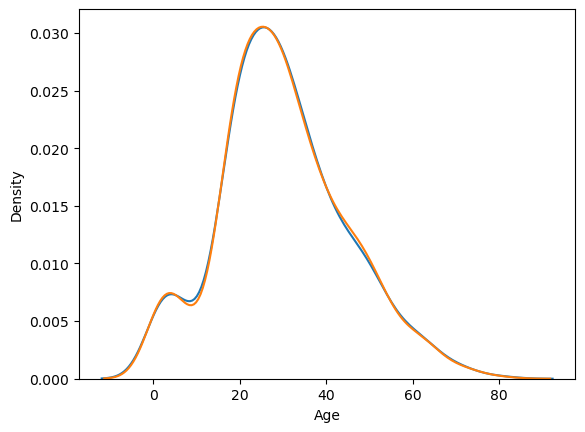

In [11]:
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['Age_imputed'])

In [12]:
print(x_train['Age'].var())
print(x_train['Age_imputed'].var())

215.50646659928697
214.89113809004564


In [13]:
x_train[['Age','Age_imputed']].cov()

,Age,Age_imputed
Age,215.506467,215.506467
Age_imputed,215.506467,214.891138


<AxesSubplot:>

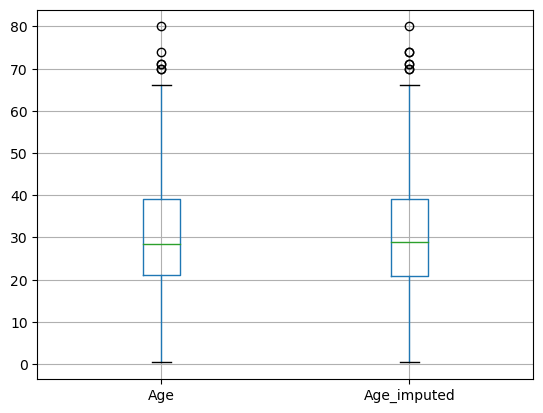

In [14]:
x_train[['Age','Age_imputed']].boxplot()

# Using Simple Imputer

In [15]:
x_train.head()

,Sex,Age,Fare,Age_imputed
811,male,39.0,24.1500,39.0
29,male,NaN,7.8958,20.0
49,female,18.0,17.8000,18.0
105,male,28.0,7.8958,28.0
616,male,34.0,14.4000,34.0


In [16]:
x_train=x_train.drop(columns=['Sex','Age_imputed'])

In [17]:
x_test=x_test.drop(columns=['Sex','Age_imputed'])

In [18]:
x_train

,Age,Fare
811,39.0,24.1500
29,NaN,7.8958
49,18.0,17.8000
105,28.0,7.8958
616,34.0,14.4000
...,...,...
218,32.0,76.2917
223,NaN,7.8958
271,25.0,0.0000
474,22.0,9.8375


In [19]:
si=SimpleImputer()
x_train_trf=si.fit_transform(x_train)
x_test_trf=si.transform(x_test)

In [20]:
x_train_trf

array([[39.        , 24.15      ],
       [29.98621479,  7.8958    ],
       [18.        , 17.8       ],
       ...,
       [25.        ,  0.        ],
       [22.        ,  9.8375    ],
       [28.        ,  9.5       ]])

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_trf,y_train)
y_pred=lr.predict(x_test_trf)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.664804469273743

In [22]:
mi=MissingIndicator()
mi.fit(x_train)

MissingIndicator()

In [23]:
mi.features_

array([0], dtype=int64)

In [24]:
x_train_missing=mi.transform(x_train)
x_test_missing=mi.transform(x_test)

In [27]:
x_train['Age']=x_train_missing

In [29]:
x_train_missing

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [